In [ ]:
!pip install matplotlib
!pip install wordcloud

In [6]:
import urllib.parse
import requests
from bs4 import BeautifulSoup

In [12]:
# Google Scholar 검색 URL 생성
def crawl_scholar(search_query, max_pages, file_save):
    titles = []
    articles = []
    base_url = "https://scholar.google.com/scholar?q="
    query_url = base_url + urllib.parse.quote(search_query)
    
    # 설정된 페이지 수만큼 각 페이지의 URL 생성
    for page in range(max_pages):
        page_url = query_url + "&start=" + str(page * 10)
        
        response = requests.get(page_url)
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # 논문 제목과 요약문 추출 (scholar 구조 변경 시 코드 변경 필요)
        for article in soup.find_all('div', class_='gs_ri'):
            title = article.find('h3', class_='gs_rt').text
            summary = article.find('div', class_='gs_rs').text
            
            titles.append(title)
            articles.append(summary)
    
    if file_save is True:
        file_path = f"Scholar_{search_query}.txt"
        file = open(file_path, "w", encoding="utf-8")
        for i in range(len(titles)):
            file.write(f"Title: {titles[i]}\nSummary: {articles[i]}\n")
        file.close()
        
    return articles

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [24]:
def generate_wordcloud(data):
    full_text = ' '.join(data)
    cloud = WordCloud(width=800, height=400, background_color='white').generate(full_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


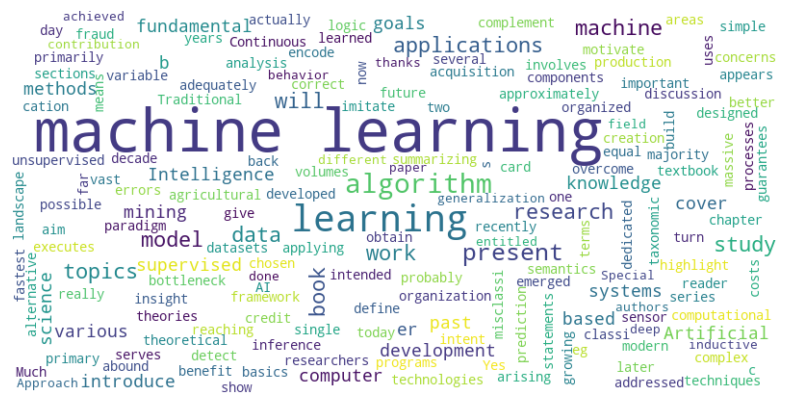

In [25]:
search_query = "machine learning"
max_pages = 3

articles = crawl_scholar(search_query, max_pages, False)
wordcloud = generate_wordcloud(articles)